# Data Wrangling

## ` ANALYSIS ON 'WE RATE DOGS'`

## Table Of Contents
- [Introduction](#intro)
-[Aim](#aim)
- [Gathering](#gather)
- [Assessing](#assess)
- [Cleaning](#clean)
- [Storing](#store)
- [Analysing](#analyse)

<a id = 'intro'></a>

## INTRODUCTION

Real-world data seldom comes clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality(worthiness) and tidiness(structural issues), then clean it into desired format before performing any further analysis on them. This is called data wrangling. 

I'll make sure to document my wrangling efforts in a Jupyter Notebook as I proceed in my workigs, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user `@dog_rates`, also known as `WeRateDogs`. `WeRateDogs` is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." `WeRateDogs` has over 4 million followers and has received international media coverage.

_Lets Get Started_

## AIM
<a id = 'aim'></a>

The goal of this project is to successfully wrangle data related to dog ratings. The data is sourced from the twitter user `@WeRateDogs`. Once we have effectively gathered, assessed, and cleaned our data in this project, it can be used for futher analysis.

In [10]:
# Import required dependencies & libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import requests
import json
import os

<a id = 'gather'></a>
## GATHERING
Here, I'd be gather three(3) pieces of data as stated below:

1. The `WeRateDogs` Twitter archive: [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)


2. The tweet image predictions by three diffrent image classification models: [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)


3. Each tweet's retweet count and favorite count. Using the tweet IDs in the `WeRateDogs` Twitter archive, we will query the Twitter API for each tweet's JSON data using Python's `Tweepy` library and store in `tweet_json.txt file`(JSON format).

In [11]:
# helper function to help load dataframe
def read_csv(file, val=0, sep=","):
    df = pd.read_csv(file, sep=sep)
    if val >= 1:
        return df.head(val)
    else:
        return df
    
    #return df.head(val)

In [12]:
#Read in the We Rate Dogs Twitter Archive
tweet_archive = read_csv('./dataset/twitter-archive-enhanced.csv', val=1)
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [13]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], 'wb') as file:
    file.write(response.content)

In [14]:
# Read in `image_predictions.tsv` file
model_pred = read_csv('./dataset/image-predictions.tsv' , sep='\t', val=3)
model_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [15]:
# Read in `tweet-json` file
with open('./dataset/tweet-json.txt', encoding='utf-8') as file:
    print(len(file.readlines()))

2354


In [16]:
# Read data line by line(loop) into empty list for ease conversion
df_list = []
with open('./dataset/tweet-json.txt', 'r', encoding='utf-8') as file:
    for line in file:
        data = json.loads(line)
        df_list.append(data)

In [17]:
# Convert the list to a dataframe and seperate out the variables of interest
df = pd.DataFrame(df_list, columns = df_list[0].keys())
#df.head(2)
mask = ['id', 'retweet_count', 'favorite_count']
tweet_count = df[mask]
tweet_count.to_csv("./dataset/tweet_react.csv", index=False)

In [18]:
tweet_react = read_csv("./dataset/tweet_react.csv", val=2)
tweet_react

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


`All three dataframes(tables) I'll be working with has successfully been loaded into memory`

<a id = 'assess'></a>
## ASSESSING

After gathering all three pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in the "Accessing Data" section.

I'll be using two types of assessment in this project:

**Visual assessment**: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).

**Programmatic assessment**: pandas functions and/or methods are used to assess the data.


## Visual Assessment

In [19]:
# Visually assess tweet_archive data
tweet_archive = read_csv('./dataset/twitter-archive-enhanced.csv')
tweet_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
875,761227390836215808,NaN,NaN,2016-08-04 15:48:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert. He just found out that bees ar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761227390...,10,10,Albert,None,None,None,None
316,834931633769889797,NaN,NaN,2017-02-24 01:03:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He decided it was time to part...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834931633...,12,10,Tucker,None,None,None,None
656,791780927877898241,NaN,NaN,2016-10-27 23:17:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Maddie. She gets some w...,7.467577e+17,4.196984e+09,2016-06-25 17:31:25 +0000,"https://vine.co/v/5BYq6hmrEI3,https://vine.co/...",11,10,Maddie,None,None,None,None
2288,667176164155375616,NaN,NaN,2015-11-19 03:02:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are strange dogs. All have toupees. Long...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667176164...,4,10,None,None,None,None,None
2004,672466075045466113,NaN,NaN,2015-12-03 17:23:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franq and Pablo. They're working hard ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672466075...,12,10,Franq,None,None,None,None
694,786729988674449408,NaN,NaN,2016-10-14 00:47:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oakley. He has no idea ...,7.594477e+17,4.196984e+09,2016-07-30 17:56:51 +0000,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,None,None,None,None
739,780601303617732608,NaN,NaN,2016-09-27 02:53:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hercules. He can have whatever he wants f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780601303...,12,10,Hercules,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None
147,863432100342583297,NaN,NaN,2017-05-13 16:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's never been more pupset. E...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863432100...,12,10,Belle,None,None,None,None
1393,700029284593901568,NaN,NaN,2016-02-17 18:49:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. His ship is taking on water. So...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700029284...,10,10,Coops,None,None,None,None


In [20]:
#Visually assess model_pred data
model_pred = read_csv('./dataset/image-predictions.tsv' , sep='\t')
model_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1488,782305867769217024,https://pbs.twimg.com/media/CttPBt0WIAAcsDE.jpg,1,briard,0.504427,True,soft-coated_wheaten_terrier,0.390678,True,Lhasa,0.034596,True
853,696405997980676096,https://pbs.twimg.com/media/Caohi_hWcAAQCni.jpg,1,borzoi,0.132845,True,Walker_hound,0.086005,True,Great_Pyrenees,0.065582,True
998,708469915515297792,https://pbs.twimg.com/media/CdT9n7mW0AQcpZU.jpg,1,Chihuahua,0.748163,True,toy_terrier,0.127717,True,Pembroke,0.042141,True
1288,751205363882532864,https://pbs.twimg.com/media/CmzRRY1WcAEoxwY.jpg,2,Labrador_retriever,0.947164,True,Chesapeake_Bay_retriever,0.020597,True,golden_retriever,0.016579,True
902,700029284593901568,https://pbs.twimg.com/media/CbcA673XIAAsytQ.jpg,1,West_Highland_white_terrier,0.726571,True,Maltese_dog,0.176828,True,Dandie_Dinmont,0.070134,True
1048,713411074226274305,https://pbs.twimg.com/media/CeaLlAPUMAIcC7U.jpg,1,Great_Pyrenees,0.720337,True,Samoyed,0.129542,True,kuvasz,0.122451,True
1593,798694562394996736,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True
753,688179443353796608,https://pbs.twimg.com/media/CYznjAcUEAQ5Zq7.jpg,1,sorrel,0.811520,False,horse_cart,0.024820,False,Arabian_camel,0.015155,False
1000,708711088997666817,https://pbs.twimg.com/media/CdXY-GHWoAALing.jpg,2,tennis_ball,0.912961,False,German_short-haired_pointer,0.052695,True,Labrador_retriever,0.018477,True
1681,813812741911748608,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,1,French_bulldog,0.709146,True,Boston_bull,0.247621,True,boxer,0.018855,True


In [21]:
#Visually assess tweet_react data
tweet_react = read_csv("./dataset/tweet_react.csv")
tweet_react.sample(6)

,id,retweet_count,favorite_count
401,824325613288833024,11848,12999
1046,743253157753532416,1366,4624
61,880095782870896641,4533,28150
107,871515927908634625,3628,20730
572,801167903437357056,6961,27386
1725,679877062409191424,726,2155


## Programmatic Assessment

In [22]:
# Check for columns datatypes
tweet_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [23]:
# Check the detailed info & format of `tweet_archive'
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
# Check for NAN values in expanded_urls column
tweet_archive.query("expanded_urls.isnull() == True")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [25]:
# Use describe method to access summarry statistics
tweet_archive.describe(include='all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


`Interesting Max and Min values in most columns, lets look deeper`

In [26]:
# Instance where rating numerator is maximum
tweet_archive.query("rating_numerator == rating_numerator.max()")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [27]:
# Instance where rating denominator is maximum
tweet_archive.query("rating_denominator == rating_denominator.max()")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [28]:
# Instances where rating denominator is other than 10
tweet_archive[(tweet_archive.rating_denominator > 10)|(tweet_archive.rating_denominator < 10) ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [29]:
# Instances where rating numerator is greater than 20
tweet_archive.query("rating_numerator > 20")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [30]:
# Instances where they have been incorrectly entered
#pd.set_option('display.max_colwidth', 200)
tweet_archive[tweet_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]['rating_numerator']

/tmp/ipykernel_20665/2957745274.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tweet_archive[tweet_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]['rating_numerator']


45       5
340     75
695     75
763     27
1689     5
1712    26
Name: rating_numerator, dtype: int64

In [31]:
# Instances where they have been incorrectly entered
#pd.set_option('display.max_colwidth', 200)
tweet_archive[tweet_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]['text']

/tmp/ipykernel_20665/3082483910.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tweet_archive[tweet_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]['text']


45      This is Bella. She hopes her smile made you sm...
340     RT @dog_rates: This is Logan, the Chow who liv...
695     This is Logan, the Chow who lived. He solemnly...
763     This is Sophie. She's a Jubilant Bush Pupper. ...
1689    I've been told there's a slight possibility he...
1712    Here we have uncovered an entire battalion of ...
Name: text, dtype: object

In [32]:
# Check for duplicate in ids columns
tweet_archive[tweet_archive["tweet_id"].duplicated()].any().sum()

0

`Zero duplicates found`

In [33]:
# Value counts for each value of source column for similarities
tweet_archive["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [34]:
# Take random samples to for general overview
tweet_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1543,689557536375177216,NaN,NaN,2016-01-19 21:18:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Downright majestic af 12/10 https://t.co/WFh2F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689557536...,12,10,None,None,None,None,None
421,821886076407029760,NaN,NaN,2017-01-19 01:04:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimison. He was just called a good boy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821886076...,13,10,Jimison,None,None,None,None
1938,673906403526995968,NaN,NaN,2015-12-07 16:46:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys I'm getting real tired of this. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673906403...,3,10,None,None,None,None,None
940,753026973505581056,NaN,NaN,2016-07-13 00:43:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Tayzie. She's a Barbadian Bugaboo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753026973...,10,10,Tayzie,None,None,None,None
1196,717047459982213120,NaN,NaN,2016-04-04 17:53:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio (pronounced Baxter). He's a Ben...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717047459...,12,10,Flávio,None,None,None,None
92,874296783580663808,NaN,NaN,2017-06-12 16:06:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,None,None,pupper,None
332,832769181346996225,NaN,NaN,2017-02-18 01:50:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @EmilieGambril: 12/10 h*cking excited about...,8.327664e+17,487197737.0,2017-02-18 01:39:12 +0000,https://twitter.com/EmilieGambril/status/83276...,12,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
203,853299958564483072,NaN,NaN,2017-04-15 17:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rumpole. He'll be your Uber driver thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853299958...,13,10,Rumpole,None,None,None,None
1227,713909862279876608,NaN,NaN,2016-03-27 02:05:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Doug. His nose is legendary af. 12/10 ...,NaN,NaN,NaN,https://vine.co/v/iDWlapaXWmm,12,10,Doug,None,None,None,None


### model_pred

In [35]:
# Use info method 
model_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
# Use describe method to access summarry statistics
model_pred.describe(include="all")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


In [37]:
# Check for existence of duplicates
model_pred.duplicated().sum()

0

In [38]:
# Check the distribution of img_num values
model_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [39]:
# Check for number of duplicated jpg_url
# assert 
len(model_pred[model_pred.jpg_url.duplicated()].jpg_url.values)

66

In [40]:
# Check fr all the duplicates of jpg_url
model_pred[model_pred.jpg_url.apply(lambda x: x in model_pred[model_pred.jpg_url.duplicated()].jpg_url.values)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


`66^ duplicates found. But since, this table is about image predictions, there is no need of duplicate`

In [41]:
# Check if there are any duplicated tweet ids
len(model_pred[model_pred.tweet_id.duplicated()])

0

In [42]:
# Sample 25 observations to get an overall idea & visual accessment
model_pred.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
951,704871453724954624,https://pbs.twimg.com/media/Ccg02LiWEAAJHw1.jpg,1,Norfolk_terrier,0.689504,True,soft-coated_wheaten_terrier,0.101480,True,Norwich_terrier,0.055778,True
501,675853064436391936,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1,Labrador_retriever,0.868367,True,golden_retriever,0.043305,True,vizsla,0.028207,True
519,676496375194980353,https://pbs.twimg.com/media/CWNl3S9WcAARN34.jpg,1,pug,0.985387,True,Norwegian_elkhound,0.004417,True,French_bulldog,0.003893,True
395,673636718965334016,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,1,wombat,0.880257,False,corn,0.019421,False,pug,0.019044,True
1140,729823566028484608,https://pbs.twimg.com/media/CiDap8fWEAAC4iW.jpg,1,kelpie,0.218408,True,Arabian_camel,0.114368,False,coyote,0.096409,False
1874,845397057150107648,https://pbs.twimg.com/media/C7t0IzLWkAINoft.jpg,1,Dandie_Dinmont,0.394404,True,Maltese_dog,0.186537,True,West_Highland_white_terrier,0.181985,True
168,668988183816871936,https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg,1,Arabian_camel,0.999614,False,bison,0.000228,False,llama,0.000067,False
530,676819651066732545,https://pbs.twimg.com/media/CWSL4W8WsAAE4KU.jpg,2,rain_barrel,0.625555,False,barrel,0.138383,False,Labrador_retriever,0.039465,True
1254,748324050481647620,https://pbs.twimg.com/media/CmKUwImXIAA58f5.jpg,1,Shetland_sheepdog,0.880499,True,collie,0.107901,True,Pembroke,0.003607,True
361,672828477930868736,https://pbs.twimg.com/media/CVZd7ttWcAEs2wP.jpg,1,sandbar,0.118154,False,stingray,0.075915,False,seashore,0.075125,False


### tweet_react

In [43]:
# info
tweet_react.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [44]:
# summary statistics
tweet_react.describe(include='all')

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [45]:
# Check for the instances where retweet_count and favorite_count are duplicated together
tweet_react.query("retweet_count.duplicated() & favorite_count.duplicated()")

,id,retweet_count,favorite_count
444,819227688460238848,7733,25652
487,813944609378369540,3732,0
715,783821107061198850,2269,8209
740,780496263422808064,4319,0
812,771102124360998913,1663,6898
...,...,...,...
2307,666804364988780544,95,250
2316,666454714377183233,223,545
2322,666421158376562688,118,327
2328,666362758909284353,595,804


In [46]:
# Check for the duplicates
tweet_react[tweet_react.duplicated()]

,id,retweet_count,favorite_count


Having successfully accessed the datasets, both visually and programmatically. 
Below I have stated the most obvious and visible issues found the datasets, with respect to quality and tidiness.

**Quality:** Issues with the content. Low quality data is also known as dirty data.

**Tidiness:** Issues with the structure that prevent easy analysis. Untidy data is also known as messy data. 

Tidy data requirements:

- Each variable forms a column.

- Each observation forms a row.

- Each type of observational unit forms a table.

## Quality
- we only want original dog ratings. So you need to remove retweets (text column starts with RT @) as a user can retweet their on tweet
- Data types issues: 1.`timestamp & retweeted_status_timestamp column need be splited into two(date and time)`; 2. `dog_stage column should be categorical`; 3. `tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns(should be str)`
- Remove columns with high frequency of missing values that can't be resolved - retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, in_reply_to_status_id, in_reply_to_user_id
- source column values are not human readable and should be edited(Change source column from ulr type to text)
- name, doggo, floofer, pupper and puppo columns are mostly `None`, melting them into one column would ease
- Convert non-dog names(`such`, `quite`, `a`, `an`) to 'None' then make title case. 
- The rating_numerator and rating_denominator values are off in many instances.
- There are some tweets which are retweets to @dog_rates which is the twitter handle for We Rate Dogs
- naming convection uses `_` instead of `tab` in p1, p2 and p3 column values. 
- mixturue of upper and lower in p1, p2 and p3 columns values.
- make column names descriptive enough
- There are image predictions predictions present for duplicate `jpg_url` with different tweet ids.
- tweet id column.name is not inconsistence, `id` here `tweet_id` in others.
- Both `retweet_count` and `favorite_count` values are duplicated in some rows


## Tidiness
- melt doggo, floofer, pupper, puppo columns into one column(`dog stage`) 
- Merge dataframe - `tweet_archive` and `tweet_react`

<a id = 'clean'></a>
## CLEANING
As the last step in data wrangling. I'll be cleaning the dataframes based on the quality and tidiness issues documented above.

In [47]:
# Create copies of the above three dataframes
tweet_clean = tweet_archive.copy()
model_pred_clean = model_pred.copy()
tweet_react_clean = tweet_react.copy()

In [48]:
tweet_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

- **we only want original dog ratings. So you need to remove retweets (text column starts with RT @) as a user can retweet their on tweet**

**Define**: Remove tweet IDs that have `'retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values`. These ids are that of retweets and won't be used for our analysis.

**Code**

In [49]:
print(tweet_clean.retweeted_status_id.notnull().sum())
print(tweet_clean.retweeted_status_user_id.notnull().sum())
print(tweet_clean.retweeted_status_timestamp.notnull().sum())

181
181
181


In [50]:
# Drop retweeted rows
tweet_clean = tweet_clean[tweet_clean.retweeted_status_id.isnull()]
tweet_clean = tweet_clean[tweet_clean.retweeted_status_user_id.isnull()]
tweet_clean = tweet_clean[tweet_clean.retweeted_status_timestamp.isnull()]

**Test**

In [51]:
print(tweet_clean.retweeted_status_id.notnull().sum())
print(tweet_clean.retweeted_status_user_id.notnull().sum())
print(tweet_clean.retweeted_status_timestamp.notnull().sum())

0
0
0


In [52]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

- **Remove columns with high frequency of missing values that can't be resolved - retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, in_reply_to_status_id, in_reply_to_user_id**

_**Define** : Remove the unnecessary columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_timestamp` and `retweeted_status_user_id`; fill the missing values of `expanded_urls` column in `tweet_clean` table_

#### Code

In [53]:
# Drop the unnecessary columns
cl = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_id']
tweet_clean = tweet_clean.drop(cl, axis=1)

In [54]:
# Drop retweeted_status_timestamp
tweet_clean = tweet_clean.drop('retweeted_status_timestamp', axis=1)

In [55]:
# Fill the missing values
tweet_clean.expanded_urls = 'https://twitter.com/dog_rates/status/' + tweet_clean["tweet_id"].astype(str) 

#### Test

In [56]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2175 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


In [57]:
tweet_clean[tweet_clean["expanded_urls"].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


- **tweet id column.name is not inconsistence, id here tweet_id in others.**

_**Define** : Rename the `id` column in `tweet_count_clean` to `tweet_id`_

**Code**

In [58]:
tweet_react_clean = tweet_react_clean.rename(columns = {'id': 'tweet_id'})

**Test**

In [59]:
list(tweet_react_clean)

['tweet_id', 'retweet_count', 'favorite_count']

- **melt doggo, floofer, pupper, puppo columns into one column(dog stage)**

_**Define** : Combine the `doggo`, `floofer`, `pupper`, `puppo` columns into one column `dog_stage` and drop the unnecessary columns after formation of `dog_stage`_

**Code**

In [60]:
# Replace the NaN values with empty string
cl = ['doggo', 'floofer', 'pupper', 'puppo']
tweet_clean[cl] = tweet_clean[cl].replace('None', '')

In [61]:
# Combine the columns into one column
tweet_clean['dog_stage'] = tweet_clean['doggo'] + tweet_clean['floofer'] + tweet_clean['pupper'] + tweet_clean['puppo']

In [62]:
tweet_clean.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [63]:
# rename dog_stage names
tweet_clean.loc[tweet_clean.dog_stage=='doggopupper','dog_stage']='Doggo, Pupper'
tweet_clean.loc[tweet_clean.dog_stage=='doggofloofer','dog_stage']='Doggo, Flooder'
tweet_clean.loc[tweet_clean.dog_stage=='doggopuppo','dog_stage']='Doggo, Puppo'

In [64]:
#replace blank cells with nan
tweet_clean.dog_stage.replace('', np.nan, inplace=True)
tweet_clean.dog_stage.value_counts()

pupper            224
doggo              75
puppo              24
Doggo, Pupper      10
floofer             9
Doggo, Puppo        1
Doggo, Flooder      1
Name: dog_stage, dtype: int64

In [65]:
# drop the unnecessary columns
tweet_clean.drop(['doggo','pupper','floofer','puppo'], axis=1,inplace=True)

In [66]:
tweet_clean["dog_stage"].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'Doggo, Puppo',
       'Doggo, Flooder', 'Doggo, Pupper'], dtype=object)

**Test**

In [67]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2175 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   dog_stage           344 non-null    object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


- **Merge dataframe - tweet_archive and tweet_react**

_**Define** : Merge the tables `tweet_clean` and `tweet_react_clean` on `tweet_id` column_

**Code**

In [68]:
tweet_clean = pd.merge(tweet_clean, tweet_react_clean, on='tweet_id', how='inner')

**Test**

In [69]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2175 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   dog_stage           344 non-null    object
 9   retweet_count       2175 non-null   int64 
 10  favorite_count      2175 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 203.9+ KB


- **The rating_numerator and rating_denominator values are off in many instances.**

_**Define** : Resolve the observations with incorrect denominator rating(should not greater or less than 10). Also change the numerator rating(not greater than 20)._ 

**Code**

In [70]:
# Check for the instances where rating_denominator is other than 10
pd.set_option('display.max_colwidth', 200)
cl = ['text','expanded_urls', 'rating_numerator', 'rating_denominator']
tweet_clean[cl].query('rating_denominator != 10')##["text"]

,text,expanded_urls,rating_numerator,rating_denominator
263,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",https://twitter.com/dog_rates/status/835246439529840640,960,0
287,@docmisterio account started on 11/15/15,https://twitter.com/dog_rates/status/832088576586297345,11,15
363,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,https://twitter.com/dog_rates/status/820690176645140481,84,70
429,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,https://twitter.com/dog_rates/status/810984652412424192,24,7
733,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024,165,150
890,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",https://twitter.com/dog_rates/status/740373189193256964,9,11
942,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288,204,170
987,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656,4,20
1024,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801,50,50
1050,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249,99,90


In [71]:
# used to extract just text column to ease visualization
#tweet_clean.query('rating_denominator != 10')["text"]

In [72]:
# Check for the instances where rating_numerator is obviously off
tweet_clean[tweet_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

/tmp/ipykernel_20665/59727966.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tweet_clean[tweet_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]


,text,rating_numerator,rating_denominator
42,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
558,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
617,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1510,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1533,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [73]:
# Drop wrongly entered ratings
tweet_clean = tweet_clean.drop([287,363,429,733,942,1050,1075,1095,1172,1254,1419,1455,1456,1483,1484,1600,1664], axis = 0)

In [74]:
tweet_clean.loc[42, "rating_numerator"] = 13.5
tweet_clean.loc[558, "rating_numerator"] = 9.75
tweet_clean.loc[617, "rating_numerator"] = 11.27
tweet_clean.loc[1510, "rating_numerator"] = 9.5
tweet_clean.loc[1533, "rating_numerator"] = 11.26

In [75]:
# Check for the instances where rating_numerator is obviously off
tweet_clean[tweet_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

/tmp/ipykernel_20665/59727966.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  tweet_clean[tweet_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]


,text,rating_numerator,rating_denominator
42,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10
558,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
617,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1510,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10
1533,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


`Corrections made successfully`

In [76]:
# Check for the instances where rating_denominator is other than 10
pd.set_option('display.max_colwidth', 200)
cl = ['text','expanded_urls', 'rating_numerator', 'rating_denominator']
tweet_clean[cl].query('rating_denominator != 10')

,text,expanded_urls,rating_numerator,rating_denominator
263,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",https://twitter.com/dog_rates/status/835246439529840640,960.0,0
890,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",https://twitter.com/dog_rates/status/740373189193256964,9.0,11
987,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656,4.0,20
1024,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801,50.0,50
2154,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296,1.0,2


In [77]:
tweet_clean.loc[:, "rating_denominator"] = 10

In [78]:
tweet_clean.loc[263, "rating_numerator"] = 13
tweet_clean.loc[890, "rating_numerator"] = 14
tweet_clean.loc[987, "rating_numerator"] = 13
tweet_clean.loc[1024, "rating_numerator"] = 11
tweet_clean.loc[2154, "rating_numerator"] = 9

In [79]:
tweet_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
2155,666273097616637952,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Can take selfies 11/10 https://t.co/ws2AMaNwPW,https://twitter.com/dog_rates/status/666273097616637952,11.0,10,None,NaN,82,184
126,864197398364647424,2017-05-15 19:14:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Paisley. She ate a flower just to prove she could. Savage af. 13/10 would pet so well https://t.co/cPq9fYvkzr,https://twitter.com/dog_rates/status/864197398364647424,13.0,10,Paisley,NaN,9616,31459


In [80]:
# Create new column rating=rating_numerator/rating_denominator.
tweet_clean['ratings'] = tweet_clean.rating_numerator / tweet_clean.rating_denominator

In [81]:
tweet_clean.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,ratings
2057,668154635664932864,2015-11-21 19:50:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Fun dogs here. Top one clearly an athlete. Bottom one very stable. Not very soft tho. 9/10s would still cuddle both https://t.co/79sHR36NsI,https://twitter.com/dog_rates/status/668154635664932864,9.0,10,None,NaN,336,522,0.9


**Test**

In [82]:
# Check the datatype of each variable
tweet_clean.dtypes

tweet_id                int64
timestamp              object
source                 object
text                   object
expanded_urls          object
rating_numerator      float64
rating_denominator      int64
name                   object
dog_stage              object
retweet_count           int64
favorite_count          int64
ratings               float64
dtype: object

In [83]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2158 entries, 0 to 2174
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2158 non-null   int64  
 1   timestamp           2158 non-null   object 
 2   source              2158 non-null   object 
 3   text                2158 non-null   object 
 4   expanded_urls       2158 non-null   object 
 5   rating_numerator    2158 non-null   float64
 6   rating_denominator  2158 non-null   int64  
 7   name                2158 non-null   object 
 8   dog_stage           344 non-null    object 
 9   retweet_count       2158 non-null   int64  
 10  favorite_count      2158 non-null   int64  
 11  ratings             2158 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 283.7+ KB


In [84]:
#tweet_clean.query('rating_denominator != 10 | rating_numerator > 20' )
tweet_clean.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,ratings


- **Data types issues: 1.`timestamp & retweeted_status_timestamp column need be splited into two(date and time)`; 2. `dog_stage column should be categorical`; 3. `tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns(should be str)`**

- **There are some tweets which are retweets to @dog_rates which is the twitter handle for We Rate Dogs**

_**Define** : Change the datatype of `timestamp` to datetime and remove the observations where `tweet_id` matches `retweeted_status_id`_

**Code**

In [85]:
# Convert timestamp datatype to datetime
#tweet_clean.timestamp = pd.to_datetime(tweet_clean["timestamp"])

In [86]:
# Seperate out the series of retweeted_status_id to match later
#retweet_clean = tweet_clean.retweeted_status_id
#retweet_clean = retweet_clean.dropna()
#retweet_clean = retweet_clean.astype('int64')

In [87]:
# Drop the observations where tweet_id matches the above seperated series
#tweet_clean = tweet_clean.drop(tweet_clean[tweet_clean.tweet_id.apply(lambda x : x in retweet_clean.values)].index.values, axis=0)

In [88]:
#tweet_clean = tweet_clean.drop('retweeted_status_id', axis=1)

**Test**

In [89]:
#tweet_clean.info()

- **Convert non-dog names(`such`, `quite`, `a`, `an`) to 'None' then make title case.**

_**Define** : Replace all the values of name column having invalid data with NaN_

**Code**

In [90]:
# Check for invalid names
tweet_clean[tweet_clean.name.str.islower() == True].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'unacceptable',
       'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life',
       'light', 'space'], dtype=object)

In [91]:
words =['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'an', 'actually', 'just', 'getting', 'mad', 'unacceptable',
       'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life',
       'light', 'space']      
print(words)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [92]:
for item in tweet_clean.name:
    if item in words:
        tweet_clean.name = tweet_clean.name.replace(item, 'None')

In [93]:
tweet_clean.name = tweet_clean.name.replace('None', np.nan)

**Test**

In [94]:
tweet_clean.name.isnull().sum()

769

In [95]:
tweet_clean[tweet_clean.name.str.islower() == True].name

Series([], Name: name, dtype: object)

- **source column values are not human readable and should be edited(Change source column from ulr type to text)**

_**Define**: Replace source links with text(string) defining them_

**Code**

In [96]:
# Observe the distribution of source values 
tweet_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [97]:
dic = {
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'Twitter for iPhone',
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Vine - Make a Scene',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Twitter Web Client',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck'
}

In [98]:
tweet_clean["source"] = tweet_clean["source"].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
tweet_clean["source"] = tweet_clean["source"].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
tweet_clean["source"] = tweet_clean["source"].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
tweet_clean["source"] = tweet_clean["source"].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

**Test**

In [99]:
tweet_clean["source"].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

- **naming convection uses `_` instead of `tab` in p1, p2 and p3 column values.**

- **mixturue of upper and lower in p1, p2 and p3 columns values.**

_**Define**: Replace `_` with `tab` and change the values to upper case in `p1, p2 and p3`_

**Code**

In [100]:
model_pred_clean.p1 = model_pred_clean.p1.str.replace('_', ' ').str.capitalize()
model_pred_clean.p2 = model_pred_clean.p2.str.replace('_', ' ').str.capitalize()
model_pred_clean.p3 = model_pred_clean.p3.str.replace('_', ' ').str.capitalize()

**Test**

In [101]:
model_pred_clean[['p1', 'p2', 'p3']].tail(10)

,p1,p2,p3
2065,Pembroke,Cardigan,Chihuahua
2066,Irish terrier,Irish setter,Chesapeake bay retriever
2067,Pomeranian,Eskimo dog,Pembroke
2068,Appenzeller,Border collie,Ice lolly
2069,Chesapeake bay retriever,Irish terrier,Indian elephant
2070,Basset,English springer,German short-haired pointer
2071,Paper towel,Labrador retriever,Spatula
2072,Chihuahua,Malamute,Kelpie
2073,Chihuahua,Pekinese,Papillon
2074,Orange,Bagel,Banana


**Define**: There are image predictions duplicate present for duplicate `jpg_url` with different tweet ids.

**Code**

In [102]:
model_pred_clean = model_pred_clean.drop_duplicates(['jpg_url'])

In [103]:
model_pred_clean[model_pred_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Test**

In [104]:
model_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


**Define**:  make column names descriptive enough

**Code**

In [105]:
dicti = {'jpg_url':'image_url', 
         'img_num':'image_number', 
         'p1':'first_model_prediction', 
         'p2':'second_model_prediction', 
         'p3':'third_model_prediction', 
         'p1_conf':'first_model_prediction_confidence', 
         'p2_conf':'second_model_prediction_confidence', 
         'p3_conf':'third_model_prediction_confidence', 
         'p1_dog':'first_model_prediction_dog', 
         'p2_dog':'second_model_prediction_dog', 
         'p3_dog':'third_model_prediction_dog'}

In [106]:
model_pred_clean = model_pred_clean.rename(columns = dicti)

**Test**

In [107]:
list(model_pred_clean)

['tweet_id',
 'image_url',
 'image_number',
 'first_model_prediction',
 'first_model_prediction_confidence',
 'first_model_prediction_dog',
 'second_model_prediction',
 'second_model_prediction_confidence',
 'second_model_prediction_dog',
 'third_model_prediction',
 'third_model_prediction_confidence',
 'third_model_prediction_dog']

In [108]:
tweet_clean.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,ratings
1721,674664755118911488,2015-12-09 18:59:46 +0000,Twitter for iPhone,This is Rodman. He's getting destroyed by the surfs. Valiant effort though. 10/10 better than most puppers probably https://t.co/S8wCLemrNb,https://twitter.com/dog_rates/status/674664755118911488,10.0,10,Rodman,NaN,276,994,1.0


In [109]:
model_pred_clean.sample(1)

,tweet_id,image_url,image_number,first_model_prediction,first_model_prediction_confidence,first_model_prediction_dog,second_model_prediction,second_model_prediction_confidence,second_model_prediction_dog,third_model_prediction,third_model_prediction_confidence,third_model_prediction_dog
1378,764259802650378240,https://pbs.twimg.com/media/CpsyNtXWgAAqvs3.jpg,1,German shepherd,0.973677,True,Malinois,0.02595,True,Kelpie,0.000192,True


<a id = 'store'></a>
#### Save copies of cleaned datasets to a masters dataset in csv file.

In [110]:
# make copies of cleaned data in csv format
master_tweet_archive = pd.merge(tweet_clean, model_pred_clean, on = 'tweet_id', how = 'inner')
master_tweet_archive.to_csv('./dataset/tweet_archive_master.csv', index=False)

<a id = 'analyse'></a>
## ANALYSIS AND VISUALIZATION

In [111]:
df = pd.read_csv("./dataset/tweet_archive_master.csv")
df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,image_number,first_model_prediction,first_model_prediction_confidence,first_model_prediction_dog,second_model_prediction,second_model_prediction_confidence,second_model_prediction_dog,third_model_prediction,third_model_prediction_confidence,third_model_prediction_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193,13.0,10,Phineas,NaN,8853,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426,13.0,10,Tilly,NaN,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864,12.0,10,Archie,NaN,4328,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True


### Source Distribution

In [112]:
df.source.value_counts().sort_values()

TweetDeck               11
Twitter Web Client      28
Twitter for iPhone    1941
Name: source, dtype: int64

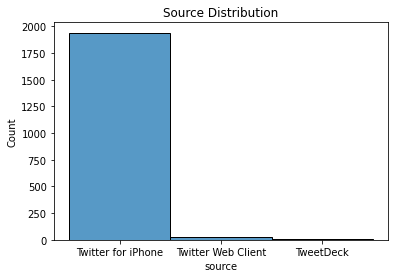

In [113]:
sns.histplot(df.source);
plt.title("Source Distribution");

_Twitter for Iphone happens to contribute to over 85% of source_ 

### Top Dogs with most Favorite count

In [114]:
# favorite dogs
pd.set_option('display.max_columns', None)
df.sort_values(by=['favorite_count'], ascending=False).head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,ratings,image_url,image_number,first_model_prediction,first_model_prediction_confidence,first_model_prediction_dog,second_model_prediction,second_model_prediction_confidence,second_model_prediction_dog,third_model_prediction,third_model_prediction_confidence,third_model_prediction_dog
309,822872901745569793,2017-01-21 18:26:02 +0000,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793,13.0,10,NaN,puppo,48265,132810,1.3,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland terrier,0.196015,True,Labrador retriever,0.160329,True,Irish terrier,0.069126,True
772,744234799360020481,2016-06-18 18:26:18 +0000,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481,13.0,10,NaN,doggo,79515,131075,1.3,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador retriever,0.825333,True,Ice bear,0.044681,False,Whippet,0.018442,True
58,879415818425184262,2017-06-26 19:07:24 +0000,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,https://twitter.com/dog_rates/status/879415818425184262,13.0,10,Duddles,NaN,45849,107956,1.3,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,1,English springer,0.383404,True,Boston bull,0.134967,True,Cardigan,0.110481,True


_Ratings for top 3 dogs by favorite count are higher(1.3)_

### What relationship does retweet count and favourite count pose?

/home/princewillingoo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


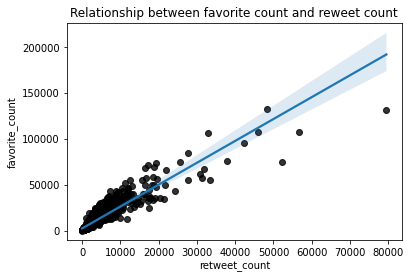

In [115]:
sns.regplot(df.retweet_count, df.favorite_count, scatter_kws = {'color': 'black'});
plt.title("Relationship between favorite count and reweet count");

_Both variable tend to be positively correlated with each other_

### Check for performance of each model

Text(0, 0.5, 'Prediction')

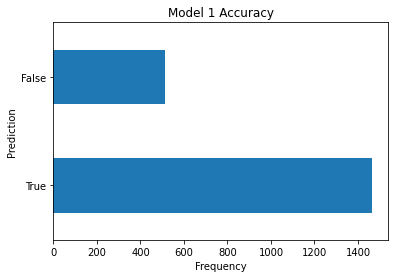

In [116]:
df.first_model_prediction_dog.value_counts().plot(kind="barh");
plt.title("Model 1 Accuracy");
plt.xlabel("Frequency");
plt.ylabel("Prediction")

In [117]:
df.first_model_prediction_dog.value_counts()

True     1466
False     514
Name: first_model_prediction_dog, dtype: int64

Text(0, 0.5, 'Prediction')

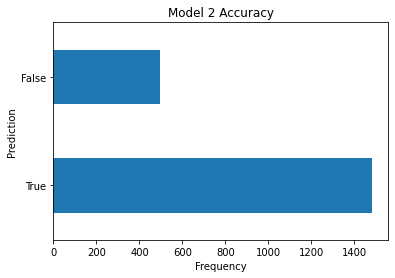

In [118]:
df.second_model_prediction_dog.value_counts().plot(kind="barh");
plt.title("Model 2 Accuracy");
plt.xlabel("Frequency");
plt.ylabel("Prediction")

In [119]:
df.second_model_prediction_dog.value_counts()

True     1483
False     497
Name: second_model_prediction_dog, dtype: int64

Text(0, 0.5, 'Prediction')

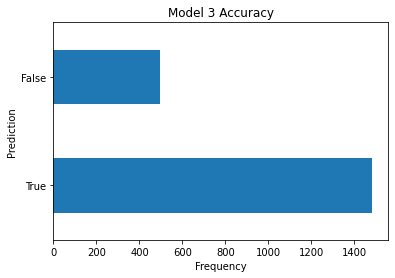

In [120]:
df.second_model_prediction_dog.value_counts().plot(kind="barh");
plt.title("Model 3 Accuracy");
plt.xlabel("Frequency");
plt.ylabel("Prediction")

In [121]:
df.third_model_prediction_dog.value_counts()

True     1435
False     545
Name: third_model_prediction_dog, dtype: int64

_All three model appears to perform with an accuracy of around 70% or higher_

## Insights

- Twitter for Iphone happens to contribute to over 85% of source
- All three model appears to perform with an accuracy of around 70% or higher
- Both variable(retweet & favorite) tend to be positively correlated with each other
- Ratings for top 3 dogs by favorite count are higher(1.3)


## References

- https://en.wikipedia.org/wiki/WeRateDogs
- https://www.jobsity.com/blog/a-guide-to-data-wrangling-in-python
- https://github.com/fonnesbeck/statistical-analysis-python-tutorial/blob/master/2.%20Data%20Wrangling%20with%20Pandas.ipynb
-https://github.com/mebauer/data-analysis-using-python